In [2]:
from google.colab import drive #google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Retail Store Inventory Forecasting Dataset
#A synthetic dataset for practicing inventory management and demand forecasting.
#https://www.kaggle.com/datasets/anirudhchauhan/retail-store-inventory-forecasting-dataset

In [ ]:
#Correlation analysis helps identify relationships between variables, showing how one factor, like price or inventory, may impact another, like units sold.
#Feature importance from the Random Forest model tells you which factors are most influential in predicting outcomes, such as which variables drive sales the most.
#This insight allows you to focus on the key factors that have the biggest impact on your predictions and business decisions.

In [ ]:
#ARIMA (AutoRegressive Integrated Moving Average) is typically used for:
#1. Time Series Forecasting: Predicting future values based on historical data, such as sales, stock prices, or weather patterns.
#2. Trend Analysis: Identifying long-term trends and making forecasts based on them.
#3. Seasonal Patterns: Forecasting with seasonal fluctuations, such as monthly or quarterly sales data.

In [ ]:
#For sales and inventory predictions, typically 1 to 3 years of historical data is recommended.
#This allows the model to capture trends, seasonality, and any cyclical patterns.
#However, the exact amount can vary depending on the data's frequency (e.g., daily, weekly) and the complexity of seasonal or trend patterns.
#More data is usually better, but too much may introduce noise or unnecessary complexity.

In [3]:
path = '/content/drive/MyDrive/retail_store_inventory.csv'

In [4]:
#!pip install pandas scikit-learn matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [5]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
import numpy as np
from tensorflow.keras.preprocessing import image
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [6]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [ ]:
'''Yes, that's correct! For non-normal distribution data, the **MinMaxScaler** can often be a better choice because it preserves the original distribution and scales the data within a fixed range
(typically 0 to 1), making it less sensitive
to outliers than the **StandardScaler**. The **StandardScaler** might distort the data if it's highly skewed or contains outliers, whereas **MinMaxScaler** keeps the relationships intact,
which can be more useful in some cases.'''

In [98]:
df = pd.read_csv(path)

#print the column names
print(df.columns)

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')


In [73]:
print(len(df))

73100


In [100]:
#only want S001 one store, one region
filtered_df = df[(df['Store ID'] == 'S001') & (df['Region'] == 'North')]
print(filtered_df.columns)

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')


In [103]:
filtered_df = filtered_df.drop(columns=['Demand Forecast'])

KeyError: "['Demand Forecast'] not found in axis"

In [104]:
filtered_df = filtered_df[(filtered_df['Product ID'] == 'P0001') & (filtered_df['Category'] == 'Groceries')]

In [105]:
print(filtered_df.columns)

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount',
       'Weather Condition', 'Holiday/Promotion', 'Competitor Pricing',
       'Seasonality'],
      dtype='object')


In [106]:
print(len(filtered_df))

38


In [79]:
filtered_df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,33.50,20,Rainy,0,29.69,Autumn
1400,2022-01-15,S001,P0001,Groceries,North,290,176,94,98.04,10,Rainy,1,98.20,Spring
5600,2022-02-26,S001,P0001,Groceries,North,167,106,55,52.53,10,Snowy,0,54.21,Spring
6900,2022-03-11,S001,P0001,Groceries,North,348,141,188,46.70,10,Snowy,1,50.28,Summer
7900,2022-03-21,S001,P0001,Groceries,North,100,58,160,75.75,15,Sunny,1,77.25,Summer


Random Forest Test small sample size 38

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming filtered_df is your DataFrame

# 1. Prepare the features (X) and target (y)
X = filtered_df[['Store ID', 'Product ID', 'Category', 'Region', 'Inventory Level',
                 'Units Ordered', 'Price', 'Discount', 'Weather Condition',
                 'Holiday/Promotion', 'Competitor Pricing', 'Seasonality']]

y = filtered_df['Units Sold']

# 2. One-Hot Encode the categorical features
categorical_cols = ['Store ID', 'Product ID', 'Category', 'Region',
                    'Weather Condition', 'Holiday/Promotion', 'Seasonality']

# Apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), ['Inventory Level', 'Units Ordered', 'Price', 'Discount', 'Competitor Pricing'])
    ])

# 3. Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# 4. Create a RandomForest pipeline with preprocessing and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])

# 5. Define the parameter distribution for RandomizedSearch
param_dist = {
    'rf__n_estimators': np.arange(50, 200, 50),  # Number of trees in the forest
    'rf__max_depth': [None, 10, 20, 30],  # Depth of each tree
    'rf__min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'rf__min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'rf__bootstrap': [True, False]  # Whether to use bootstrap sampling
}

# 6. Perform randomized search with cross-validation
random_search = RandomizedSearchCV(model_pipeline, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='neg_mean_absolute_error',
                                   n_jobs=-1, verbose=2, random_state=42)

# 7. Fit the randomized search to the data
random_search.fit(X_train, y_train)

# 8. Best hyperparameters from randomized search
print(f"Best parameters: {random_search.best_params_}")

# 9. Evaluate the model with best parameters on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE) on test set: {mae}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'rf__n_estimators': 150, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 4, 'rf__max_depth': 20, 'rf__bootstrap': False}
Mean Absolute Error (MAE) on test set: 42.44999999999992


In [92]:
mean_absolute_error(y_train, random_search.best_estimator_.predict(X_train))

38.559663865546256

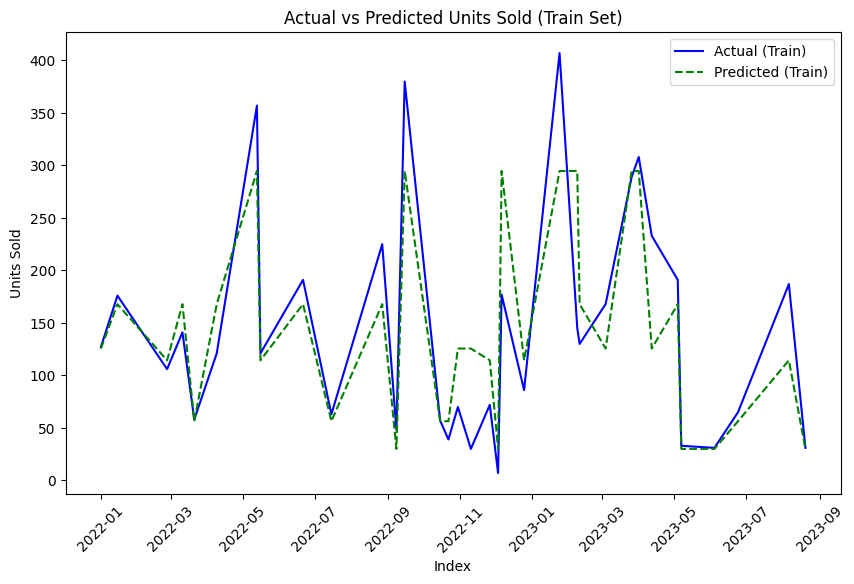

In [93]:
import matplotlib.pyplot as plt

# Make predictions for the train set
y_train_pred = random_search.best_estimator_.predict(X_train)

# Plot the actual vs predicted values for the training data
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label='Actual (Train)', color='blue')
plt.plot(y_train.index, y_train_pred, label='Predicted (Train)', color='green', linestyle='--')

plt.xlabel('Index')
plt.ylabel('Units Sold')
plt.title('Actual vs Predicted Units Sold (Train Set)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


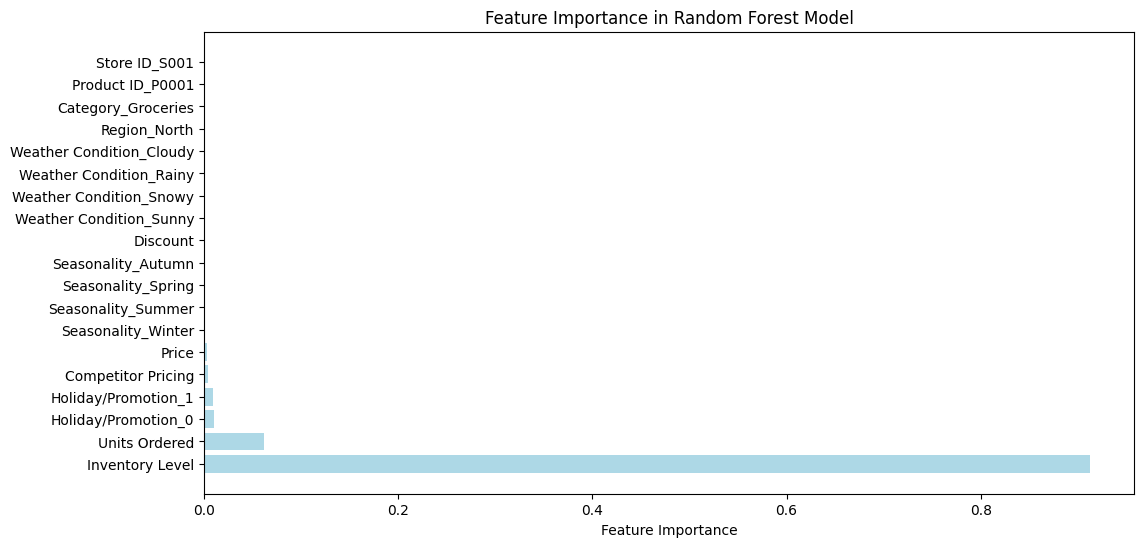

Inventory Level: 0.9124
Units Ordered: 0.0620
Holiday/Promotion_0: 0.0105
Holiday/Promotion_1: 0.0087
Competitor Pricing: 0.0035
Price: 0.0029
Seasonality_Winter: 0.0000
Seasonality_Summer: 0.0000
Seasonality_Spring: 0.0000
Seasonality_Autumn: 0.0000
Discount: 0.0000
Weather Condition_Sunny: 0.0000
Weather Condition_Snowy: 0.0000
Weather Condition_Rainy: 0.0000
Weather Condition_Cloudy: 0.0000
Region_North: 0.0000
Category_Groceries: 0.0000
Product ID_P0001: 0.0000
Store ID_S001: 0.0000


In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Get the RandomForest model from the best pipeline found in the RandomizedSearchCV
best_rf_model = random_search.best_estimator_.named_steps['rf']

# Access the column transformer from the best estimator
preprocessor = random_search.best_estimator_.named_steps['preprocessor']

# Get the OneHotEncoder and apply it to the categorical columns
encoder = preprocessor.transformers_[0][1]  # OneHotEncoder
categorical_cols = ['Store ID', 'Product ID', 'Category', 'Region',
                    'Weather Condition', 'Holiday/Promotion', 'Seasonality']

# Get the feature names from the OneHotEncoder
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Combine the categorical feature names (one-hot encoded) with the numerical feature names
numerical_cols = ['Inventory Level', 'Units Ordered', 'Price', 'Discount', 'Competitor Pricing']
all_feature_names = np.concatenate([encoded_feature_names, numerical_cols])

# Get the feature importances
importances = best_rf_model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(all_feature_names[indices], importances[indices], color='lightblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()

# Optionally, print the feature importances for further inspection
for feature, importance in zip(all_feature_names[indices], importances[indices]):
    print(f"{feature}: {importance:.4f}")


<ipython-input-107-9cf07f5e2037>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


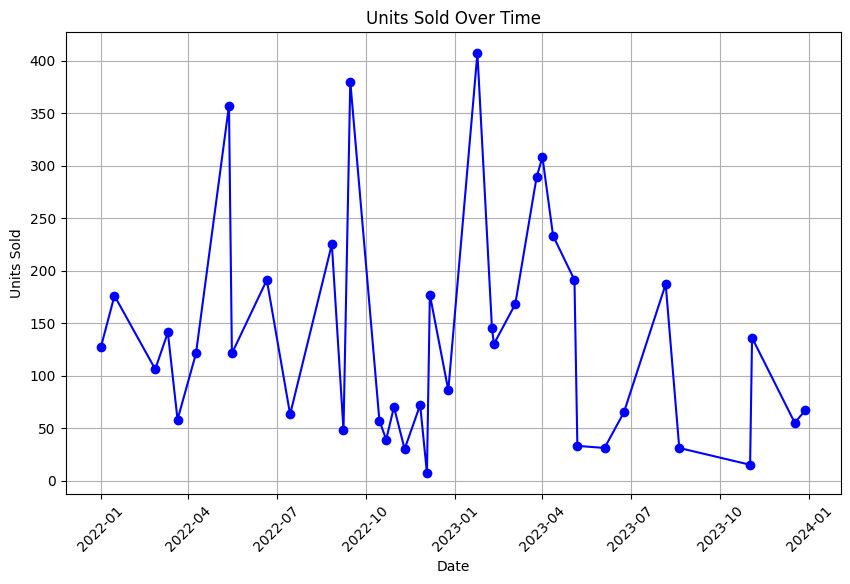

In [107]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime type if it's not already
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# Plot Units Sold over time
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], filtered_df['Units Sold'], marker='o', linestyle='-', color='b')
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-123-3b5abaf15139>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


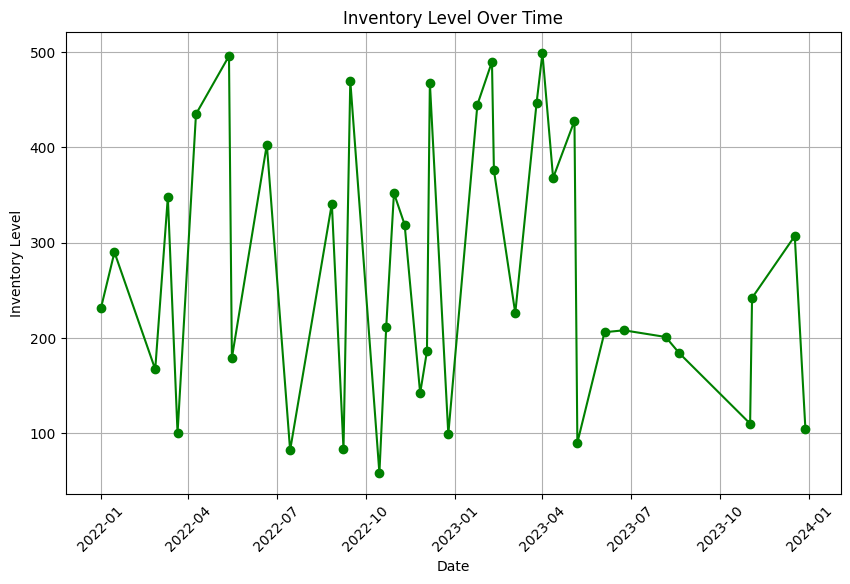

In [123]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming filtered_df already exists and has a column 'Inventory Level' and 'Date'

# Convert 'Date' to datetime type if it's not already
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# Plot Inventory Level over time
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], filtered_df['Inventory Level'], marker='o', linestyle='-', color='g')
plt.title('Inventory Level Over Time')
plt.xlabel('Date')
plt.ylabel('Inventory Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


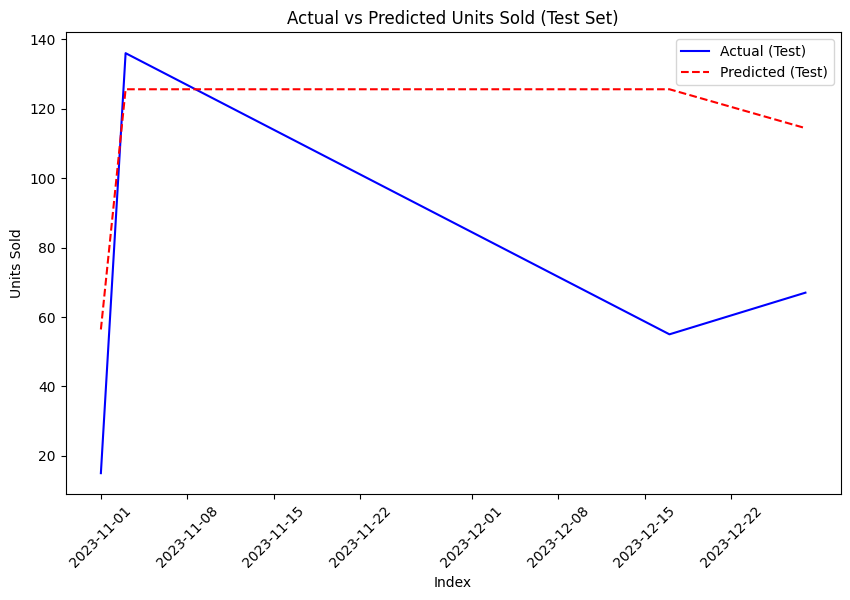

In [94]:
import matplotlib.pyplot as plt

# Make predictions for the test set
y_test_pred = random_search.best_estimator_.predict(X_test)

# Plot the actual vs predicted values for the test data
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual (Test)', color='blue')
plt.plot(y_test.index, y_test_pred, label='Predicted (Test)', color='red', linestyle='--')

plt.xlabel('Index')
plt.ylabel('Units Sold')
plt.title('Actual vs Predicted Units Sold (Test Set)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


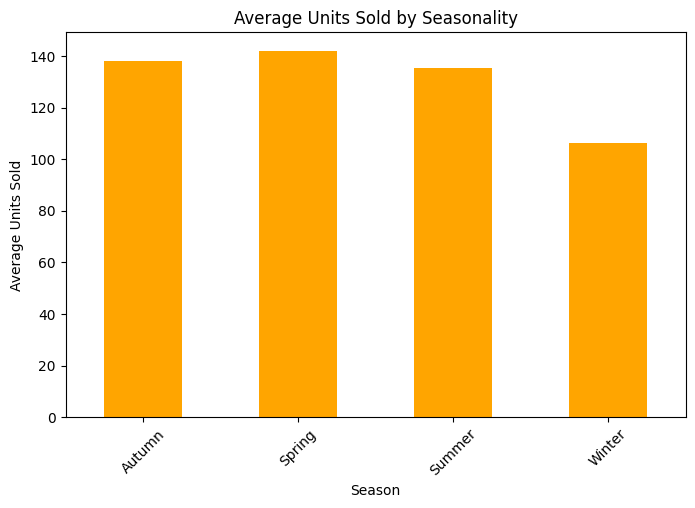

In [108]:
# Calculate the average Units Sold per Seasonality
seasonality_sales = filtered_df.groupby('Seasonality')['Units Sold'].mean()

# Plotting
plt.figure(figsize=(8, 5))
seasonality_sales.plot(kind='bar', color='orange')
plt.title('Average Units Sold by Seasonality')
plt.xlabel('Season')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=45)
plt.show()


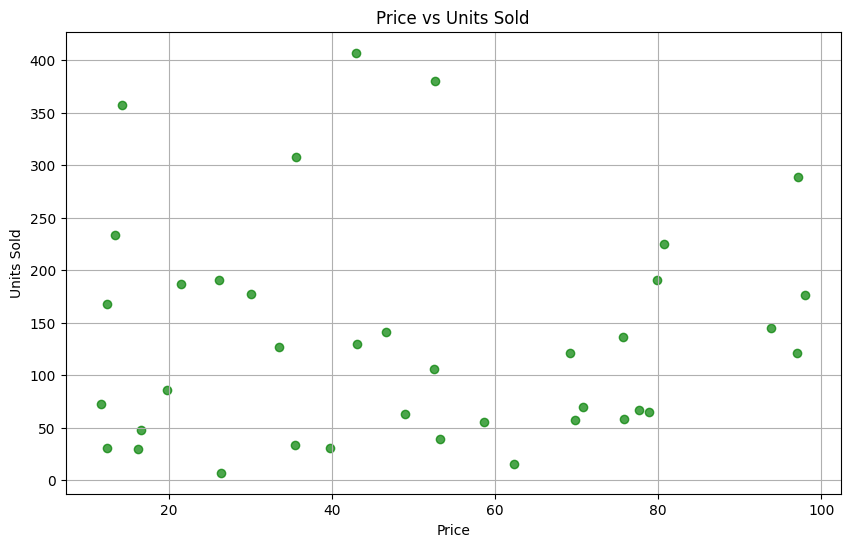

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Price'], filtered_df['Units Sold'], color='green', alpha=0.7)
plt.title('Price vs Units Sold')
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()


In [110]:
price_corr = filtered_df['Price'].corr(filtered_df['Units Sold'])
print(f"Correlation between Price and Units Sold: {price_corr:.2f}")


Correlation between Price and Units Sold: 0.02


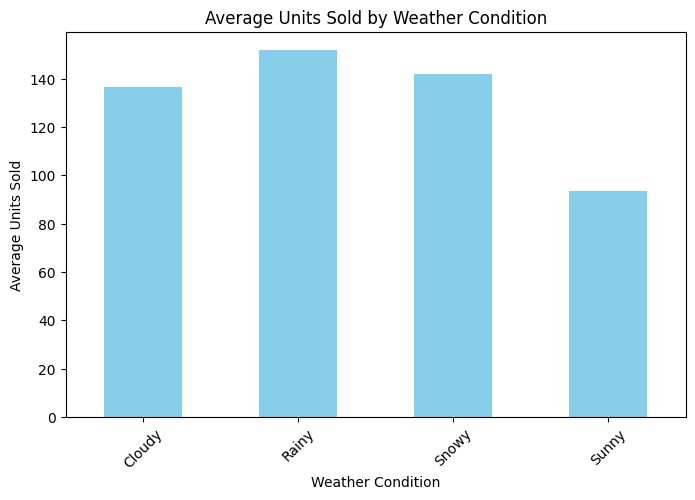

In [111]:
# Group by Weather Condition and calculate average Units Sold
weather_sales = filtered_df.groupby('Weather Condition')['Units Sold'].mean()

# Plotting
plt.figure(figsize=(8, 5))
weather_sales.plot(kind='bar', color='skyblue')
plt.title('Average Units Sold by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=45)
plt.show()


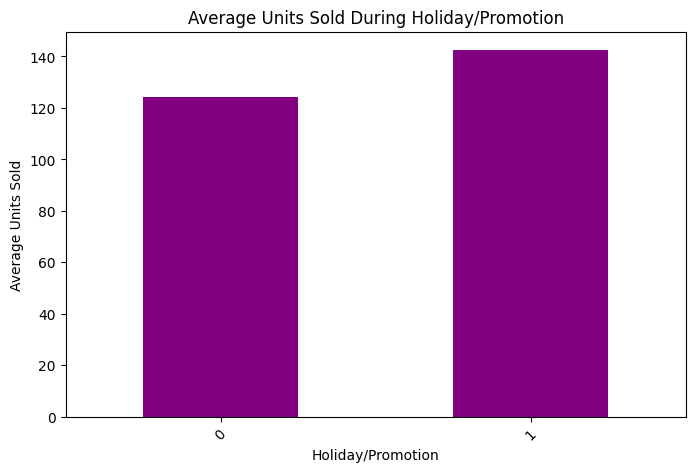

In [112]:
# Group by Holiday/Promotion status and calculate average Units Sold
promo_sales = filtered_df.groupby('Holiday/Promotion')['Units Sold'].mean()

# Plotting
plt.figure(figsize=(8, 5))
promo_sales.plot(kind='bar', color='purple')
plt.title('Average Units Sold During Holiday/Promotion')
plt.xlabel('Holiday/Promotion')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=45)
plt.show()


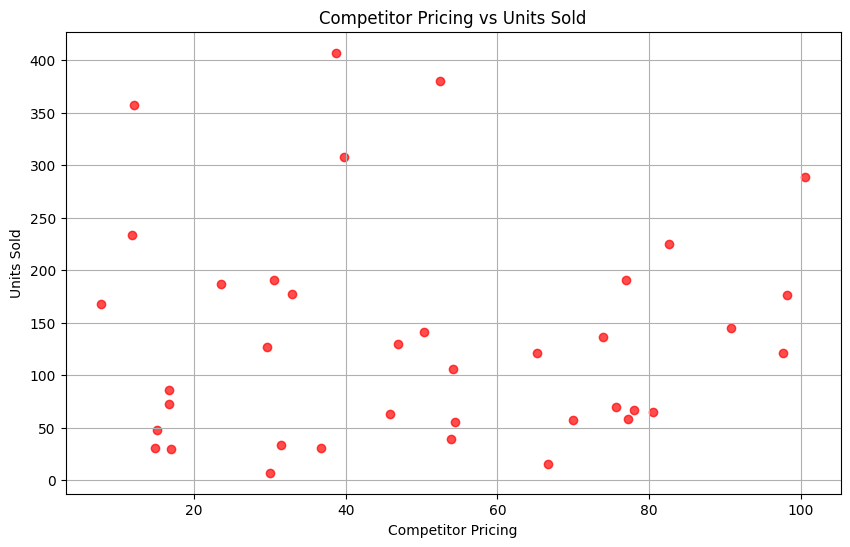

Correlation between Competitor Pricing and Units Sold: 0.01


In [113]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Competitor Pricing'], filtered_df['Units Sold'], color='red', alpha=0.7)
plt.title('Competitor Pricing vs Units Sold')
plt.xlabel('Competitor Pricing')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

# Calculate correlation between Competitor Pricing and Units Sold
competitor_corr = filtered_df['Competitor Pricing'].corr(filtered_df['Units Sold'])
print(f"Correlation between Competitor Pricing and Units Sold: {competitor_corr:.2f}")


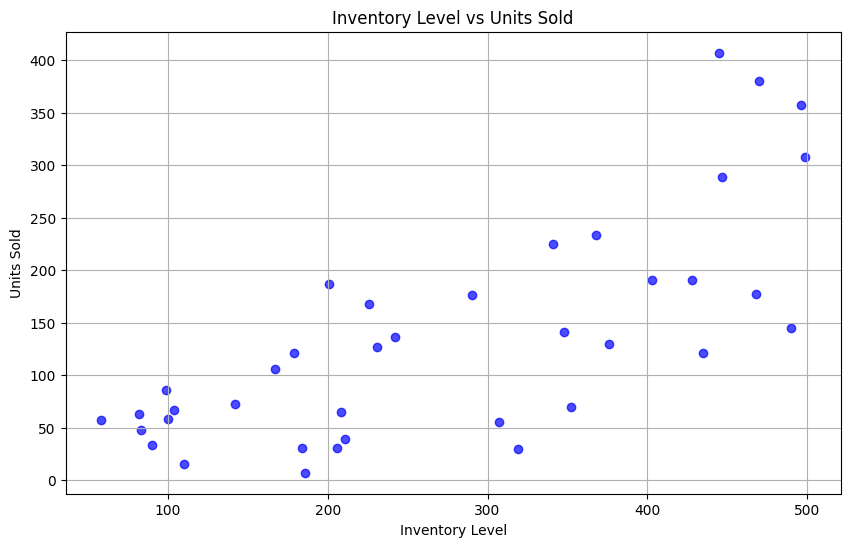

Correlation between Inventory Level and Units Sold: 0.74


In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Inventory Level'], filtered_df['Units Sold'], color='blue', alpha=0.7)
plt.title('Inventory Level vs Units Sold')
plt.xlabel('Inventory Level')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

# Calculate correlation between Inventory Level and Units Sold
inventory_corr = filtered_df['Inventory Level'].corr(filtered_df['Units Sold'])
print(f"Correlation between Inventory Level and Units Sold: {inventory_corr:.2f}")


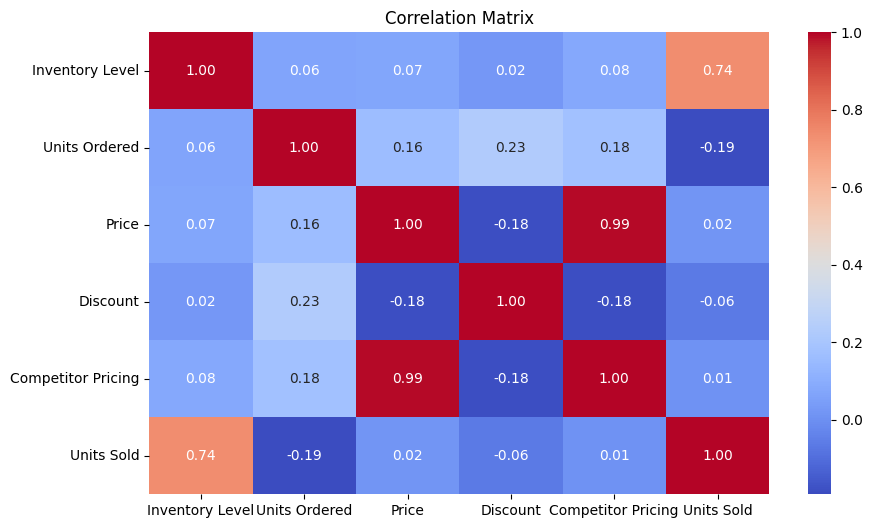

In [115]:
corr_matrix = filtered_df[['Inventory Level', 'Units Ordered', 'Price', 'Discount', 'Competitor Pricing', 'Units Sold']].corr()

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Preprocess Data

In [ ]:
print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

In [ ]:
train_start_dt =
test_start_dt =

In [ ]:
#print the number of rows
print(f'Number of rows: {df.shape[0]}')

Number of rows: 234005


Random Forest Regressor